<a href="https://colab.research.google.com/github/Neilus03/DEEP-LEARNING-2023/blob/main/P6_CNN_PretrainedModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/DL2022-23/blob/main/Problems%206%20-%20Pretrained%20CNNs/P6_CNN_PretrainedModels.ipynb)

# CNN Transfer Learning

In this notebook we will learn how to finetune a modern
CNN architecture from the [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html), which has been pretrained on the [Imagenet dataset](http://www.image-net.org/). The [`torchvision models`](https://pytorch.org/docs/stable/torchvision/models.html) module implements lots of popular CNN models such as: AlexNet, VGG, ResNet, DenseNet, GoogLeNet, etc.


*Credit: This notebook has been adapted from the official [PyTorch finetuning tutorial](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html).*

The Imagenet dataset has 1000 classes and millions of images. Training a ResNet-50 model on ImageNet-1k with a single GPU takes several days. The key idea of transfer learning is to reuse the knowledge learned in one task to solve a different task. Transfer learning is specially useful when we do not have lots of training data for the new task nad/or when we want to speed up the training of the new model.

For the target task we will use the [hymenoptera_data dataset](https://download.pytorch.org/tutorial/hymenoptera_data.zip), which consists in only **two classes** ('ants' and 'bees') and only around **one hundred training examples** for each class.



<table>
    <tr>
        <td style="text-align:center">bee</td><td style="text-align:center">ant</td>
    </tr>
    <tr>
        <td><img src="data:image/jpg;base64, /9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCABgAGADAREAAhEBAxEB/8QAHAAAAgMBAQEBAAAAAAAAAAAACAkGBwoLBAUC/8QANhAAAQMEAQMCBAQFBAMBAAAAAQIDBAUGBxEIABIhEzEJFCJBFTJRYRYjQnGBCjORoSRDUmL/xAAdAQACAwEBAQEBAAAAAAAAAAAGBwMEBQgCAAEJ/8QANhEAAQIFAgQEAwcFAQEAAAAAAQIDAAQFESESMQZBUWEHEyJxFDKBFSNCkaGx4QhSwdHw8TP/2gAMAwEAAhEDEQA/AMTFqYukS3ULW0vt3766VtY4tSgWBjM9SoI+hY0hUxhMiUhKQBvyPfpYVDitx1WlEW25O+RETvIwYrTrcVoa1+Y62P7da9EUtagVGLKqeYFys/zpiz9t79vv025E2RFb4fSY/EOJMbWiVEQ8XGyFBSUklP8Afr27Mt/IvnE/kkZgtcG31UMiVqk4muEMz5NRcRDgbaA9VSjr0zr7+d9A9V4bYlFGdl8AZOefWIplSlpCVRqIwx8Nrm5xrxvjii4o5IVCybKercKoPx48VpfyIU6lSmngsfW0QSk+3g/56TNX+xpuouVV5oKeCSNyLm1gd94MKQqfZaSwFDQT05dLw8DMXw3eMGbeT2B8+3ozWaBlm1W20y3aRILDNypACmkyQj/cDa+5SfvpRBJHW1w7WEFpUrMIulWbEXz2PI/xF2oyxKQps7fp/HSLg55ZbRx3xFc962tBrMUUaKmZLZkoVt1jYBU2QPqICt66weOZxyXUlmRuFKIH0ielSmpOpzPtBk8acpWBn/ivbtxxJdPqbT9LaktvJUlfavsB8j7/AHBB8EbHWHLcZIMsW3MLb3+m8a7lBUhWc3iQcOrYsLFOJ6NiTElATbVgUkOsU9lX+2ylTq3C02T5UE9/aD5OgNknpsSU2mcl/NaV6Vi4J6np7bQKD7twoIynEEs1QJ9Th1GjV+clUN4HQ39uq8tIrbZW1NKveL6nNSwtsbRyR4NNp9KbSlltIWPGyPboHfmnXj6jAY0wEi5iNXLXW2W1jv3obPWtSqfqINovMJ5QM9115Dylo37n/jppUenkZjTS0DiKudaCz6nhRPnouQu2IkVTudotjEl62vadX1dUVaoat9riU93af/0P06FeK6LNTbV5U5H/AGImaYQnDgxBicensESeRuPrtbRSWXY8sSklD/YPVHsoJ2B3dYc67PsU1Tb97C1/pGI5IpU7pTtG3i1+b+M7ZtKifx/IZVQVxG0h9xaVJUkAD6knpJy4l11EPkW/YwXFbjbGlW0NQxHkLFd8NWRX4kJD9Lkx0yYUxsBbQToa+oeNa/fpgSvE8iq2MiKv2a8RqScGPq83uTfFjC2PaTUMy3fYVKRKeTEgJqLyNyHT5CG06JUfvoA9AfiNU3ZuUW1KI8xyxsB069gOsE1Ep+hVzgQBll3lfLi6w9x8x69Npc/a5DMZoMRyVDfqewGyDvwPPXE8iOKJpbrcqCrkbC8Fs3MNN2JIt3iJWtf/ACfw/dNUaekJk0eO4C7QZckNhtxY7yqMSPKRvyN+/W5wn4h8Q0gJps67oCDhKsG3btGdMSUqpXmKA9XMRdd+Zm53XouBcWGsd0SdQmYv/ltPyVKW6nY7vT7P6wnet+Njz4Ow+ZLiSuVVCy0Ck6bpIyL22Pv1iu7KSbLYUFDVf2x/uOeLViY7Dr3foJ+xPg9OCR9SrQl306U3vA53fXFJUsFej+3TNo1OuBHqVetA/VWd8zIUe/ej+v79MaTY0Jjel3QFXiSW7a913RTq1Ubdta5K/Taaz8zUZEGC7Ibp7X/2+pCSG0/uogdV5yZYYWlLywkq2BIF/a+8ETStQ9MQSoPgjSTsf9dazDVt4x6g6LYj1Y8s3IF/3pSaDjKi1SuXgp31YzURP1oIP5yf6Ujx5PVyozEs0wTNkaDjPPt3gXUtWoFO8NXvCy+Q5tNnDOe7hu23r0mJQigtU6M64l9QAPYpQT2q9zskj9t9Ib4KVlqgmckGQtofMFWuPb+AY2F1DW0WphWkna0MC4b3R8V7j9jWDhuoZNiWVx2aeK36rUqe7Om0qEB3raYSn60lQGkg7CSr3146VvijxJwwXHHpVpz4o/gSQlJUcAm4262tBRw4JwpDStOgfiN7gfT/ADGhHiBT8Nc4L5xVeV4wqpkiba4eejuVOIDHaWlIR3Ooc9nfPsB9zvpZeHztQmZp6XqIsUjYbW5C/MQU1KYaS2ky6tQPOHl25IkWFe7FLpdOjw6A8R5CAlPjwAAP8dFVPqs1IVLydNmzFKYlm32NV/UIjuXrCxjVsp21Xrso1CqVWmtllHzP1KSn9vsP06h42oFOnZ9t55pKsG9/5ivIBaWym5xFhR6tNx9cNOti0KHBjWmWO0vsjf1K8aGvHgfr1LT3pmRnkSsszaXI+YcoldQh1oqWfV0jlz5otSdZUGO2/pz1fvryejfg2fTOOEjlCxn5ZTabGJ98NalRLZ5eYZy/lvEFwXZhtioyYsWoTaI7Io66qGz6KHHVJLKlJVvSVH82vv0ReLFaXJ8PPKklpLqNJUnUNWm+cb7Zt0jzQJTzpkNrwDDG/jkcPuNV22VK5t4GpNesvMVar9MptXtGlwEfhlYQ62pBkx47SO5qTtKVrIJSsA/SD5Ij/Tv4ymoaaZNm2Fm52TbNrnl0HfEEFapq5Zy6MjG0ER8DOfULT4P5ExPRrXstjIGQBWIqRWmi0JBcbXHbMpXaV+kjR+nRPg+NnpYeN/FE0/xv9nyzg8oBAJ3CRa5t36d405FxhtlLrl9ac2+uLQMPH7/TQ3xV7lyHb/LLPNHxY5Tg6aQbZZE1uotBHcJPe8E9rR+yNd3g76cHFv8AVJKSkyJSSb9QFyV8+w0n9f0ipKUhyYsoi4P0tFG8KsJYh4P5cv8ArWQshLrF2Ip9RYpjhaaRGlMIQ6qNLjJ8qcQsoTsEgoWCkjwCWDVeK01iVYmflTj07kFQ2V/1oxH5Yyzymyc+0ad+WmdeJvGPBcfN9x29QbicRCbcZW6A468soH5fckkn2Gt9B664XVplKUjW4s2Gbf8AlovIYbaHmv2AEZ76V/qCsPzJcin3dw6k3BTG1FpiXEup6AmayVKJTJYQhX06KRpGjoe46Gp3+mqozE2Z+dmUOBWS3ZSbdgsHI63GY0U8cy7bGhtshfW4II7giCbwh8e/FtDm0K3rHxzZ+GrTeqKFTaZQKeppLEcnSlKdWpTr7g33Ek+fOgOsOf4A4nkXSpttCWANkc+lzk/mYs0ziSmO2Sq4Wev8QdXKf479m4aomMsg4wvTBucLJmRFRqnSotWdbuSk1BHcorciKQAmIpAbAcUd95Ke32PXmU4TrNWIQlJbWP7k+kj369hyzBRPPS8kyXnNj0Iz7Rmm5XfHX5gcksjmv2PNmY7SFFijwqY6448wT4Hb2janDsew/sOnHw9/TzKJImKu8p1fP8KQOg7QvJrjh9XolkhA5cz+ca7/AIWXxhuGt8cZsJYpuTOKa5nxmkNt1Wk1FLrlWmVAJJeISQSs77jsHQA2dAdAPETk/Q0Oidl1JYQTZQHptf02Vttb6wVyaWZwpW24CogXGL39ozSckcCV6s5Hte0rgoFdoKHJkVD7XaEOhh1xKVFG9jeide/S+4SrqpBpxxdgoA4PaAubT8Q4EpOLw7vE924w4iceqtxVq0+6blwrHuiRbzP4jSVy5CpL8shtDXyyFFakuKSj1+0eSk7+odKjxCfrNVqbrEgnzHSnWtKSLelI1EXNhjlfPLpBfTGJWWltcwbC9gb79L94huGciQLBu0X/AHJddtTrFtatyC7AnRO75eK00SqfKkLIajoaQVDWioqUdlPaNr+ku/BS6fhUqM26QEoAuTnItuST22/SamyLjyluPizSed7CBos7lHjDOnJLKmX+OL1Jl4/auJiETE3CaTMUjvSGipGh63a4pJ1pZQrW9Hol414Or1Kk236s0pp1Y1f3WBOxscEW+kVW3pdcyX2yFJFk/Uf46RbvKSf8UfIONJWaLiujFOLeNlPW9HvJ+zZMiRc34AhpSlFL0hAbSlfb6KvS/mJ7+78vkFPhfw1wpNvGZcD0xOkAI83SloK7hJJNtxqNjzEXqlVphtFmbIQNzuf9fvaM6d88wsc59mV24p+OpOP7fhMs25YkWjvBp+EklAXMqD5QsElDiQlISdua2Pp312FSvDeZpWmW80LUr1u32NrkJQLi5uDcm2PeBb4/4oKeti9h163P/ZiL0O465f1h3Lj7POTr2qttVCW5Jp1IfSJBpjqlFaXXFjSUuAaUWm/pAH335hqxElNonKIwkKQMqvbVixAGcHqc84YEnweJ6XDc6vSo7WG389uUBDljCt0YYr0Km3AI86kz44m0ipx9mPU429d6D7hQPhSD5SfB+xLX4V4zlq1Ll6XuFIOlaTulXQ9uhGCISfGHDM3SJoy0z7g8lDkR/qPBh/F1/ZyyjZeJcWUVyu37W5yIcBhKuxIV5KnHF+yGkJClqWfCUpJ6t8U8RSNGpj1Uqa9LDYJUd/YAcyTgDrGJTpB2YeS0yLqURa3f/vpDO4HA+DJ5YJ4uXNWL2z/R6Ky1/EdRxuw22uA+uKHVIdemEMsNsrKkOOuKSBr3SdpHPtL8VpudoArlHaQw68T5SXzYFIVYkacnUMpxbuRYw6Jqg6mxKzSyryzZRQL2J636bGNJnwqPhUcTuMd/3Byls29KJnO4oiZLFCXMuWl1RdrtqZSh5v0IKltql95UkvKIU2g9gAJKzizvirxHO08M1qXQw4DcpSSdQ3SrqBflscHtFaS4VlWnStlesdbbHmD3hxNM45cNZ2Qn+V1icc7Dk8hE0KpQZ9Yo1OZizKoVhKlR3fKGC+v0UNh90d4Srt7wgqBpOcbfG0osOEqaGSFG4BA77WvyxztF5FEQ1MAmySdj/wCQvnk3hN/lXdsK4v4ZrGNLrqrCGoX4k0YaV7P0ltWvdOtnQ+wPSI4arUwsuCt3bWCLXxcHG0ZFQlWysKlMgwPND4ic0KLAbwZR0G3bbShFJqFat1xyq1F6IlWyg6BWwHFBtxTuyo9gGwCR1XpLzip6ZFKQXX3znYISkG9sfML2JAtsOQjWakWmmUuTRwDgWx/J/SPp3ZwUtfC2NnrvfrtSqts25ITOuW3buozbiUvsyUJbeXFUpaXUgrbc9J5CgD2qP6Ci3UZ2n1AvMrKKi3cD0AAjmE3uQbddxz5R7rFLU7LJUMsnJzjtjEGZQLSta5bLoF31yp42vuya++xBqNsS6XDaZqK0glrv9FCdqR9RSdbR/TrqrP8AifXi4mZfmivNlJKQRboU2tYxBKUZgIKfLx23iY1zjZi7DuP8lm8uQdz0DDtQo8uXHsu4rji/h1LilH1hL7+nnUJ0oBTrhCQTvx10TQOEuFKrIqrki35LyQSEJJvrA2SnY3OEgDeMV6cn2FiWX6kqO5GLHkT2jNHlb4VtvUiDamReLeS7Jynjqqon3jUPlJkWXHtx6G6w48w6uM4exJZWAnu8Ba+0DawemIKpUfsuXmn0qWpbHqB9K0WBwoHNxcHYE7Ra4eSwzMOIcXazidNsg55ciMW+sLKuOm2yc9Xaq751YauMJjgwIBLjzkxKdF5ccpProcSAfoKVBR7UpOwk3KIVu8PoZaAAGqylYGkn5b4KSnvfAv3hwtTrTdXMwsk30+lJzcCwOxBvgdR9YsLklbcvLWIafAah0in1WjSXKhBK5oUtbHZ2aZR7qCwhS1AhJBGwD5BEvDRkUKrr81epLwAwPSTe++1xsOu14/fGWUNak0Oy7GkNZJtke459+m9oXFx/yPlHA3ITHF54wTHYyNCqzUOLFkgmPP8AmD6C4r3aQVMvJdKCUneldyTsDrpLimgU+tUh2Un0hbChci1/l9QNjzBGx9o5QkH5mQmQpGFp/wBcuxEbtcXfCaw3i7AOZbLpLeQLdtjJEymVe9bfiTG5qPSbUh16kioPJ+ZcgKd7/wAxDitjuUr7oitUYPvy9YnFLU9LJ0tlJCUgG2SkfiwADgDBAxDDptScZZXKMgBK73vki4sbH2653zBg2XxkxZgTH8mh4FsSPhqmMxlCNDokpbafRL3rONlJ7kqUsl3ayO8950pO9gQ4yX54XMzH/wBldVFR2A0k+3+I1aC15VkJ+Ufl7wUdhz7exhbEORXKRW6nErEUynmoKUlUF5QCkJcQog+W1BXjewD4J6Vb1DLA+DfQVB0bXsAeivpvBcJpKh5qTbT+Z9oF+qV3IOZrmxDZDrpui2qW27V5C2VFmUA06GkoJGiDruJA9+39+kPXKfPLeZM4rzikkqTc2tfkd4+UltJSlpOi+x6wxu85T9m2rZ1WxbaDNcqshJafZZ/nS0pSkKSsp91DfgknxsddJV1c4xKyj/D8olWNJCfmSLYPcf3c4qUllhSnW5xy1si+xzkdvaKNy7iTGeUrJuW1czmn2xflaYbrtNbCHgpFSSpRS8txI9NW1fyyhe06142B1LMzshJBT1TSlubcSSLg5PdWbXOMGK7skqZAaaJU0D2wMWsP1gS+P1StS2ZVdsJVoW7VqdIWhgwCwAkOt608knZC972rYO9+3WLwuzLzVUVQGSHFLN1ax1GrYDAF7Dp1iCZV5Ut8YsWANgAeht9b9ecSDlLxywRek608h5a4y41yBVH2RQmJtVpCKiuNFUSUxx3dw7CSo+R5J9+m3xDKucNybbcgi6CsDUi4seRIHMWtc+3OMqmzyp0q1Ktg4Ntuf6QqfkdiL4cdYlW1jW66viPjNl6NDkQJ9PsyqqtWozKcXkrAkCAppLjClNtuKD4UCUJV7oGoeDeMKy5R0vThUp5tSmnCpvWHNJ9KiCCL2O4teJ6lTUh/7sXbICk5tpvvY4O8Kkuvh7iqVx+z9yht6zruse2Is7+HrAZpkmRKk1K34rzgm1WQ8orWt2c8FLbeUVD0mWSkkLBBdUa5NAMsagpZUlRuBpClYSk2sAEJ3GPUSDBBwlobqWiYulNlJNidViL3F7kk4t2taBIta5bmrNlUSt0W1LJsJmIltqdMuNwRTrZK+2GNuLQsdjgCik7WT+p6EJ2mSrM44h55b6iSUoaGr2Gs+kWNxi+3sI6Seq7zskG22UstkZU56DfrpF1Z3yRvm8HZgrhMznjImMOYmKrdxpV6Vj64YlRrlNtxp1iDUkRn23wmnR3AtTmkOq7m+5RbXHVskOJ63eH6/U5SVekngshViA5lzJsciwNrcvwntHK/GtGk1zaW2tPp2Un5TzA9j72BHeGs/Et5tchMOZy4z2TgW1bsquLPRj3/AHTVGWO6DclNlKUw1Hbd8pW202HXVaOw4W9/l6hqzst5Tgfe0G33Yucne9hy/CL878xElBpoU2pak3N89oOi8+Tdo25a+O6/Ll+tYVd9SO65He7XkLCe4BJKVdoI2Ce0/fWvfrldHFc3OVANSwDgT6ikkjAOcwWLk5dqXUp06b4BtffaCeol4ryHZrNwU1yJEiSktKTodyW0AAJQknydAAdPatLen5L7hYSTvAfKIDa/UI8WEr/4wWZnTKWHLmfqtJynbcgrZ+ZjuH8TjOsocS4w6jSF9yFo2zvaDrYHSvqT1Fk3VrmgQkElJ31flkHoCLEbEwQNMvuJSAQTbI6fnFPU3kzdeILyk3tJohaxT85IjSmJD/YqmLUkFDaUL0olXchWkg/r7dI2h+NU/LTzswyNaCqwbyCR1GLCwyb2jXnOHkKKUBNwRckciOsDxyZ+IeMg2tbeVbftWsWZRabGdgLkTEKU1IbU/tzTrYKUKAG092vcnxrrd4zrs/xHWZZSG7eRfF7gqJCgkjobZ/KKTVN8tlaZZQJVv25fmIAbGXM8UyQ9kC3mptVoVPUoz5QYUtLKSra/UWkdo0nzskdNfgeSfp1QmJ+ZOmbmFE+wPIc8n9oxanSVNy7cuvKEwzS8/iC2ZlXEVXtXHMa5q81WmTCMksKiPpjKR5DBSrvQrX/tBGv6fPkTcUeN0xK6qW0kqWfmV/gc7nmeXKJpLh5AUJi2RsN8/taACuzGvA/krUqZUK/h6wHMuW3TmW7lfW04EuJjElhqQjuCXwfzErBJ9iSCR1Ro/HtTl5ZptJUwldzg2BJwbc7kcxY/XMEoQlwqSohWwNxfbP6dNoGesfFr4J2xGvLFdxXFXoEeHGkUmbS2aG4IjiEAtmMyWh2aI8J7dAftrp0Unw24ofYS803qbcsQdQzfmQT9YCJrienocyr1pO9juDyMZqaFJozWUmFU2JT5mP7g75dMn3VU1FLsdbigjuYc2S42B6ZACvI2D9SeugJtt0U8+YSl5mwUlpAuCAL+ocjvc29t4klauHppKj6kuZCnF3z7HmNrZjWJ8Ka6Lyn4aqkO2rnpFzmm3R+HFdKhqiRoSlMNvLbSvu0vt/lnuAT2k9uj46594rZnWptC5VtYCrGylDUR1P8AaOvM7xeqUxLOq+8Ukm1jYWGOUNDzRcVmW3QG5CrOpamlNzGJEV19IbjKfKVvKjII02ha0qdKPbvWsjQIATfiRxu0NKg3ZWUlPP6f9zi9RJJ0JVm6Tn3tEc4k2JgzO3G+qYXv+2KbVwRJajyXkgSKV3POKjuMvD6m3GtpKVJIJHg7BIO34XSMrOShQkJS8sZVbbsef0jFrLiwQ4q6kA4EEVjPjtVMd4+t3GMXJS7/AKxr0lyEMJgteoB4+nuWU7/v1qVbgyfbeRL058OoV8w2t+UfSVYZUhSn0lFtud4gtpcJeNnGqzLDsvHTNGnX3Wq1DkzLrvaZLrNVqkBwFbyjJUoKCiS32tgtoAA9tAmr4nS1LqBblH3Qy44UgK02FrAYAsB/k7mJuG2JlhKnUpKgAb+/c84IfO3De1aHaNs0CBU502jvzkVOLPciNlCprTiHS2spHY2XUoUgkDygr+/ulONv6fnKTNtvUxaltrChqIsEki2bHvqF+YG9oIZDikzAPmpGra1+Rx+mIE648N4uyjaGS0W/lS1Lutqt0dNPlUWn1NJajSEIcSrtSgkKC3FBa+7yFNo1rR3Re4QlqdMNzkq/oQzmxKgonmTe4OR0FrntFxLjplwyUdbEbZ22hXVOVRuEWJrox87SKTV3XnJdTSwgoVFlyHW+1SXW1pVvylIAKSCn6fv1bnqKjiWotVNM7ZxsJSU9gd0nke+/eK0lNKbSG3k37wvTDvKqh49ep1v1pit2Zc7OywzKjKabkJJ89iSACPOtD26aHEHhvNKbcmmAF6s6hYke8Xp4ttLHwygpIi1GLf5C3tb993Lg/G9Yq711K+UFSSAhhO1aLqjsEpSCVHQJOjrqnw9wkqZfZM5cttcgN7ZsDtc7dBzgTqdSW0FmX+Zf6dz+8Zn+WWCKxx0zzemKrgu+m3vcEJbb86fFjLZbW86n1FJCXPq8d3uev6LeG3Ff2xSG5wS5YTlIQSCQE+kG4xm0JniCmfCzSmfMC7WNxfnmLIsHK9wZgtqyMD5Btu07wXBTHpNs3FP9VFQt+KhRUhhK2yEvoSSUt+tsISpSfqT2hIpxRQm6VMPcQSTq0EglxsWKHDa17HKTzOm1yL73uacLTT08yimOoSUg4Vayh2uDkRrV+EHCp2LMCXDYaLWlU2FTrllfOPqfLi6zPd7HFzthKW22wFNspQjegz5JO+ua+MuL3Zx34wOCziU2FiNITgDJNyNyTbeDBmlIaWpi19B36k5hgTuF77zddt4VatTIQsNiURFcV2lySAkaKkp/K2n2H3OvP7pr7CnXluzRUCL+k2BP/gjZM0gAM2sOcXPxZotcsu8Lrsz+HVu2H9C26k0Alt59WwvYGiPyp0r28/t0R+GdafokqtqfQVlxRIAGcwP8Q0xD7gVLGwHP/UHnbmPo9EuKNUGKtJnhzTqV9qdRvPt+514305abQ0NzBnWlK9Vieie3/sDj04SkNKA5/WFZ8Tuc3G74kcd25Ztj3pb9MtmHTpU964UCK3PcX3qfDbiVlLjLSm0JKu4BRUDoAeRjinhSTS+hirBPmo9XpVc45nn7DeCCk1p/SXpO4ScZFhnpFo85/iKRcMXrg3F1qUqucgJapQrcsWq5GciQYfa4236vY4vb5WNhtXs2e7YJAI5Wn599wpXNILKQClOxUb7EAE7c+8XafLAODS0rJyeQ+pxmEZWpxZ4/Y5vzNWdrOm5NsSRWa5LqVJoP4kW/kVSXC4Y/pNKCO1K1rA3sga2d9BPHnGlbq6WqWWUlKQACUgmwxlRF9vpFr7KYlUrdDts8jb9IJS37Cxw8abVr9nSKlcDMlmQ6iW8XChrW9aP7/wDY6XfDsqpmfS2lOkJOcYNukWky2hhS9Vyocz1gi7LwFx3zfl6zb4qNGotRh0d4kx5TafLvskDY0pJBHn3+3XQEnxS688uSfaLaLApVyUOh7gwON0pTKEvpcuTunoYY7KtAU24KdbllWXBtizG3U6LQDTSVq/QDXv1lVNue+KShlBS1fJ2H/GNJkNFJKsqjHJ/qKuM2AsX8k7PqmIHLkqOa69Acql5U5l1UliOwhIS0+UefTJ0RoeCEk/bfXUng5xG6htyTdIDDdgCSB61Z0g88ZPT6wEcScOl1xL6ASpW47DH0hZOJs08bcFWTiyu2XxqpWZ85NNmTctdyBJkLpdMkeuShql0yO8hLnY2lJMh5XkqI7PG+t6pUqsT83MtzsyESpw2hCQSU2tdxRHM/hF7dYmSluVYbMui6+ZJIF+wEaJcEfEehUesW7bWU4dsUjHN0xm2radtuhNRI8aoL2ox3Q35AcB7go/1JIJ89c01jhV1TSyhN/KvqTgWG1xzwd4MWHwVA3yq1veH3YWq8Gy7YmV0TIlRpzsZyW8iTKS20ygpJCiSd9h7dbH69L6nVIySigDUk9SMd40H2PNN9jF7YkVUrqo0OrPri0VEqF8y20ygLJB8hP9gP89MLg6mtVFaniv1IGw9oH6xOFkJb04Jic4+Tc79ceZqkeVDo6XCgLWrQI39h1r0h+cZU4icH3ZwIzZtlp3SWj6o5eGI+fHJ2iWPa3HuTmq8YeDmVJhfgjCm22/llL2porSkLUgknaSojrozi7wfobzztWRLAzJubknfra9r/AEgFk+J5xpkSoX930sP3teNXGEuTfH/HeHrXRNfoFPBaR6pQlKFOqUBsrUkbP/PXKsnJNS763A0PMO+CTiC9+bfcl0tazo6coh3JTlhx1tK3m7ymvPpp8aOuZHj05rvMuZr+UhY+yCSCT+3VFcpPVWZRKyKQVE2N8ADnG1JMNsILkwcAe8Kexly/urKlz9kic/HqNTmISpSjoJClAD/AGtDon4i8PU01PmnOnMeEVxLw0CNXWHsXTMC4qsC5a44i+KrKU292R060lRCgdfqN+/SY4rnJpp+XmUm7QudI5n+IIaVJN6FIV83UxcfPzJs6jcdaAuDOetp+t1aAlUxh7036ekLBKgR5B+3+etLiqsvzcu2zb5yD3xEbMmEXUncQgPl3xfdxrnC1uUlz1S4r5x5dNKFFr9Sn90kQlq0GVqWQQhAPj7Dz0VTcvNfYKadLrusKC0kb3HzDuecadDrTLcwVvDFrQmen8Df4lyXmDHVPuSZSJ7NO/HrQQhAcRVo5e/mIWfcKbSdePPkHpxz3jA5JSklNOthQWrQ6f7TbBHYnOekCL1MVMrmGWFWUhOpI65zGk3ht8PjAUjD9k09wJvL8N9GUTLUVFh78yTvexpWyNaI9uqdfmW51Di2ndK17kAG1+gOLGB+QDyFJStOoJPO/7xSvNCyLUh3CJtIrdYpuQ6GYVGgtIecahTGUL0hptgrKSjbiiT5Pdskk9JL7NTLsKlnHPONzclIBtbGRzHWDd18uOeagaNha5IJhjXHTlrecW2IeNrbo8KTd0LsiVCqLWVBoJ0FIbSfv4A37dBfCdaqdMW6JcZcO/YY/WNyoU+VmEpLpvpGw6w76zqvQLqthuqvPuM1f0/ScipH1h3t9tf8Ae/06eb/EK6lL3T8w3HQwFN01MsrO3WOM9AQ8p5Cml+moEEE+PPXe7xGnIhLwaOLKtd99O0216pXnDBjqSUtlZ7VaP3346TPFsrKSKVTLSPUq8blMfcWQ2o4hhlXtik1K32aXcFQTIaQ0AphxYKd6/v1zXJ1p5qaLrCbG+/OGtqSWw2o8ooTFdqzJebbMsOyXIKavPqLMeH6zyW2kL79grWfASBsn+3TE4ingqkOTk3fSkG/M9P3gXNNeVMJQxkk4jerw8yBamRcXqprMyPckq3FJpin9gokSWvpcKD7FIUCPH6dI6QcbU2UrTcpAt353gvVfZJ7flFJfGyw/fL3Bu98v4tEOpVWhxkVSoRUu6S3HbIUtTf27kjZ/fWuiul8OSb07LPP/ACKUASORVgfra8eBUHG0LAHKKI4s8/eGWdfhd3kzmfI9kUhyNakin1Sn1KShMlqQGCPpbV9RUT7Ee5PjqhUKRUKZNLo7jai4F/d2BN8+kj/sc48qVLvoMyhY0WznbEAN8LvibXci4pxTmzJlcmVSpwnnHbflxSfWMJW0Jbe0dqBbKQd++h9x0c8WU+WcW80GrNEi43sob499oEqPMPJS24VesbEf2nkevtDm4nHCo4MmXRc+P7wj0i33W/m51DeI7UlZ7itIP5fcnx/x0ta7JIblC80uxTuL5tBXIFZe0qF0mBcsO3LErd71G7L6pUXIVeqVZDMFGwoU4JJ7VlP6D9f36zKHWpdLBaUNSlYv0jSqNOd8242EHvQrUsuj3G1IRS6HTXlqIS4ygBSyPuerLs5L2sspHS0eGmHAraLk49Scg1bPd41AToUmxoYZjR206AWSnZ3+qgDrf7jqjwC3NGpvTJUPLsAB1iSveX5SW+cf/9k="></td>
<td><img src="data:image/jpg;base64, /9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQECAgMCAgICAgQDAwIDBQQFBQUEBAQFBgcGBQUHBgQEBgkGBwgICAgIBQYJCgkICgcICAj/2wBDAQEBAQICAgQCAgQIBQQFCAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAj/wAARCABgAGADAREAAhEBAxEB/8QAHgAAAgICAwEBAAAAAAAAAAAABggFBwQJAQMKAgD/xAA5EAABAwMDAgQEAwYGAwAAAAABAgMEBQYRAAcSITEIE0FhFCJRcRUygQkXJJGxwRYjQlJyoRgz4f/EAB0BAAIDAQEBAQEAAAAAAAAAAAQFAwYHAggAAQn/xAA2EQABAwMDAgMHAwMEAwAAAAABAAIDBBEhBRIxBkETUWEHIjJxgZHwQqGxCCNSFBXB0RYlYv/aAAwDAQACEQMRAD8A9BFuXC2pSUh1P3z/AG1/JLp3UG4BTF5yrWj15haEnmM/QHWr6fMx4whJ32XL1WSoKHmZ/XThj8XSx7lCSZYUknPXP89DyNBQzuUNzJSSFHl1OlFQwDKheEMuyeLwXzzg9idK3XFihgLFTaZCHigpXlJ+vprqZ27IR8TfNZK/yYOSc9/bUD/dRwQ5Uo4PMA8h/XSaoz7xUuxAtXgtuRHBgYxnSuoYA0ldjASh3pbLT8mY4W8hROcDtqiTZvdL523S4v2czHnOOrQAlSjkY1UGUm2UuBSp0fdPPS7zcTgtP8sfTVk0+pcHWCuVuQrDgbjiOjDzhKx1PXvrQ9O1/YPf5S+Y2wAptrdKGDlTxCvc9tWuLqcHulUsoPdZ/wC8iC6BxdSr9e+mLdcDviQ8ko4CiZF9xVKIEhCSe/XXMmqNKH8fssRy74ahkPpJPv30PJWMPJXzpc2C6WL2THOS7yaPpntpTJWBmRwiY5r8owhXvDlt4+IbGO4PfUj9UY4XTRjrhYFQvGIgjD7fQd9KajUYhzwiBJhV7U7ybfSpLLvLunPbVX1LVg7hc5vhV3U3RKQpPRWT6emqxU1lxYKGVp7qqK7SY6QpRKlH2Ok05PKEdGCUI0m8UNM8kr+b6/TTyihDcqyvBAwpJ++WQAku4P308hzyk87iTZDc2+/LUrypagR9DnUvh5xe6SS3uoVe6c2KSRK5gdvm66KiMzM3v90M4WUS9vW42vLz6kpH10Wyuf3Qz8G9l2Q97FziAy+sAeue320WNQ/SFzDE95uERNbrkJ4h1xSu566imqCW3TaKjcBdTVP3XcQvJeUhJ75Oq1U1JYbhNY4njJ4XNW3aabSpXnnj6/NpVWaqA27iui25uEOQt24r8ryhLGc9QFf01S6zqFgdbcFyWkK5aJdTE1CAXEk4zn01LT6gJCM3XzZL8r6rUhgNqcbWCcemjahzQ291y5w7LWrC3SS211kgD79NWuKnyrHIMXXRL3Zb6fxOFH300j28JJUjKiV7nF7Kg8CO3U6KjZu4Sp8Ryo5d+Ovr8tLi1Ensn10SxgB95CeGSpKEzPrzgSvmlokfbU0sjQNvCNp9KMhu5W5RrQSxFCk8uZ6dM6UzV7APdVkpNJaBlYlVhz4Y/hkOEj1OcjSqSrkcRuwE4bQsAtZBEit16IopeCk+gOO+u3U5flCzU4afRBN23nUG2k+ZIWAQSQD3Gqbq9G5zwzsq9Wu2g2QZQ71lPSm3G31Die/11X6/QmBhDgq82tN8JtbL3FfajIR56lD3PfWfmSoonkR5b5Jux4LbqwJe5ThZUnzOn/LOuv8AySqdgNC4c4ALU4JdSBKfNWkf9DXoNsjQMFWhzxwVhlVbecIb8456DodFxlv6UvlBc6wR7bFr1eYoOTluoR3440VEDzewX5HQbjlXhRbVYZLaS2tZOOpGpJq4N+Eo2HTAOyva07dcdkxY7DKlPOLQ2hIH5lE4A/mdKmTySvs3vj7pkyna3KWPfLxPVO59tN6LW8HNOrO6m8FuFqK78FHz5xD4ZmfhwGTIcYUpIOQnllRRy4nPpHpb2HupXx6hrsjYqcDcb/tc8Wv3XElaNpEeSkb8Nfi8v6DV6lt9vbG3ftauTnRHeTVaHIck0+QsK/jHELb5paSSB5iOWFKSkpwcj0s/Qen6qn2Rsikj9C0/wbhLo6l17F30TSWtuBeVfptUn1qoU2tV63B8DcSqRLVKT5ZHJqcuKkZ8ooUjzCyVqbUTkKwceVutejoKXUTT0pDA74QfhJ8g7i/z5OEVKTa5KwqlVZNdpzdRDkZ2OsApcjuh1p5JAKVtrTkKQoHII76xbqLTTA8CRu1wJBB5BHmqxqLtwKwbfju8+OSgZ7apmoyCyqgaTgK/7aU6hKElSx9tZxqoBym0HKN3EPFHmFSiMZAzpAxzb2CLMVxcoMRss8495rjRCcjPTA1vEGn2HvOVvdFuKLoG2sWGgBcQKUOx46ZxytZ7rcogQNAyjM2nRbbt6r3NWipimQ2uYQkfPJcJAS22PVRJAA1ZdB0h9fLtGGjn5eaJBaBdUhfW5tw+H+XbV17z2/CGy1XdRFeq9LhL82z5KyPLRP6nzWF5CfOGOKhjHUA2vTuk6LW3yUun+5O3LA44lA5t/i7uBkEKE1F8cJm9z7rhbfbQTr2tWt0B+5awwmn2aoyUeXUanIQRGW2T0U2jPnLV1SlCCVdOmh+gfZ7VV2rtpy23hOBfcZG05+vb5oZ1TYXJWmH9mbYEyJv9Or9r1W6KDe8VuoR6jDlSPKpVMrLDjvxkyU1081txtSUobzxbfUlfbAHsD2nVf/qJIKgEnFrfqFxjg8AKJm6NwdFh37D1P5ytzlR8cW018M1ilbV2xVPEDc1vwnJNeqcJDTNvWwllHJap9cfSWG1DgT5bIdXkABPrrzA7oKZhbVVJFOHH3W/rN+LN+L6usERLVtcc5P534COnLIsp6DTNyaNakS3rgq1LZkKJZS1IZbeAkeU4U46hayfvk+uqpPSCnfJExxcwOJzm/ryRnvZB1FQPiv2STV3Z2RbkuruWS1TYFKlSVzXaNISUxEvrOVuRloBVG55JU2ErbKjzCUnPIXqTXmVkDYdTBdsFmvbbeB2DgcPA7XLXWxe1lXp5w7kIaobdMaq1Nodfp060LimEpiRZ4QETlp7ojSEEtPrx83AKDmDnh0IGM6vo8/gvqaF4niZlxaCHMHm+N3vNH/1Yt9UCKI23tyPzsr0pltraKOLZA7j11lM1Y6U7Wi5UkVP5rurH8M0UAYx3I9ND0sZ3+9yiajAsnIqdusMIWox+Axj8uvQIqL2wr/I3agVFLDr6EhvCM4xjt76PiAugfeJSo7reJjZ22K5ATXoG6d50ajqW/GhW9acuciVLT2KnEpCMjOQCf7a2XROnqp9M6mjljj38lzw3HkPn3X5LKwCzr/YoD3Y8bvh43C29umyZdl+I+NSZbC2qiuZt5MRE+A8rm84844kIS2kFYOfVHT0Om1F7MaiKVj6WqhdICNobK3de+LZvfyQf+oYL7SfstNto7K+NPdmn7dTtjrR3nu3w5wroqCtu5Tj7qXW4ClHyVLfUnLLRDZeQrACjzbUodMepqLrDQNPrp46uZkdTtb4vFi4DNj3cOCPkVA9znjK9C/hp/Z67d7MUu4KtuvVKNuzflWTCMidIgrb4huN5bvxLZfW3LfdUr/NXxDSy0lSUgqUdeYeuPbXNqUsctOPC2Ajm4NzyByMW+X0Xcc4ZzwefUeqsncbaCDH2wtbYG0KTb9p7cS7niSKxTKawmO1KpbbofW2y02AA0tTbaVZ68cpOe+smHXkzqtlZId97gkm7g62PoBfPnZHVNI1sZ8K9lf7dEqN7S3Y9MYSrj1ypQQhtPYDr07emleodUUMA31EgaPU/mEljoZqg2jBKhK1sdVgy8+y7S6itI+Zth7kofp66zGT2l6NWzGCmqGud/P8A2upumqlova6qCt7WUqrUuXRLkpkGpUd4cX2Hh8qsdj0wUqBOQpJCknqCDpTFWSsqW1NLJsew4c02I+v8jg8EJV4EkR3LtiWnEplMo9NE+bUX2Gyw5LlPBx6WB+VbisD58YSf93Hl0zgW7V6Wk1Gojq6eIROcP7gFtpf3c0DgO5LeAb2wvppG3BZz3Ha/p6Hn9lU99U1qFHkKxgew1U9b6aER8aMWK4dMNpDgth1XRTipbaeCkj641fZ6iOPAWiSG5uUFQ1UNdU+GAakkA8uIyhv/AJnt+mhaXVYzLzwuGNucJb5W59I2a3cdsrzC1YdfBfpb6VHhEnjo5H9grHIfy0NrfUgqIJJ6X+46H4gObHv6jz8lw5wY4NPB4+fklN/ajeIm7ra8KFz0uxqzMt+VX6nEtyoTmlkLYgSEu+akEEY8zghon6LV9xfP6TNTZrfWLIa5nuxse9o83Ntt+17hA1swtZvoli8D3jHtcVDwmbBWdIvqgXHcUdVr7gqr9Wcn0+jXAXViPUYrrpKokFSG0NrjpHDmSpOMjPsf+oH2OUep6dLV0IEFU27vEGA4XyHAY4zusXWvcpc0OJDWnnH56L0Vf+KNRDtNmXd4odlaJRXnUMuraqiHXGyR1wMpGcjGCfvr+fsHsfrXlrqrVoWtJyRISQD3sLfyEU/TizL3tA+aozxb1nYjZ6m0QUPdf96F6IYcjtJg4MYtkYLi1pGEgkYHElRIOOxIr+s9IRUsrafSK81D2khzto2gckAke8fqbYuUbqup0lLSiaR/venda1Gt1b4qj783/FVejsBASmIxKUhDKD1+bByT9yTpZVdO0wsHxhzv8nC5Pyv2/ZZHXe0GtkJZCfDZ5D/n1Vtba71XbTKrGWa3UZsRKgVJccKuQ9cE9jqi9S9FUpZuYwMf2IwR9lDo/WVZDUCVzyRi91ZPiK3dctaoxZfmBhuVCbkhPbkSDk49++gOgdOq9UvI93vNO3Hp+ZWs9Q1LBtkbazhdIxL8T85Tq0iQvjy6YOt/pujKtrQBIVSG1hJRtb289QvxaKfGjSZ0lWAQhJ/7Ok3UGn1dOzdUS2b9k1ik39k4Ny+IGntoWguhac/MOWM6qEmo1tUbRssPW/8Awmc+txtNiVSdxeJzgwqJTzHp7fUKLSsKX/fOp4emq+cWkdYegt90NN1KBwLJctzNyKJeVqyIVYk/BJaWmXGlKVhUd5BylaT39j7as/SnTE9DWB8DdxNwR5g8g/nKFbqvi4H7rXh4jvE5L3boUjbFMOPNtR1LaJ63OqpikEEFB/0kKGQodc+2Rr057K/ZU3RKlur7tswJLbfpv5+eMEJZW62S7bHnzPb6JUbGh1GmVSlMsVyu1VhmXHlNRUc2HH5DCwtkuuNKT5mClJPLP5U8eIA16c6g9os81A6F7Gtu2xdfseTb1+a4/wB+3Ya3K2M7cS51GdTct+V12ZOUpUgtvPlYUtR5KKv9xJOTrxR1eG1bjBQswcE2SsU7Y7yzceXr5K5abUa1utcK/wAGeRUpLp5BC3QhuOkAAYyQBgDAHoO2qLWRRaTTA1OA0W4yUlnbVV82B8vIDyTC0Tw7X/TUQq/UalbUS1HE8ZMv8SbUmKkHqVpB5dx6ZJPTWZ1/tN06Uupo2uMw4G05PoePvayOk6HqwwSvs1nc7hgfJTds21HnXzR7Ts+pG41S30stuoZLWRn5lcSemBkknoMHOoKypmko3Tzx7Hf43vnsPuk0OnB9UIac7gSBfj8sjjeK1YW6F2zpENLj1FYQ3CglQ6rZbTxCz1OCogn9RpJ03q7dIg8OPB5d8zyrp1Bq4nqSIvgb7ot3DcX+pz8lSkbwoya1I8pqnLRHz8z6gQke2daNp3tBqZheAF38fUoenpGgbnnCd7Zvw2WvtvT0yobKZlSHUuOH5QfYeutN0zpg17RPXgPd2B4H0/7XL9W24hH1K0uS75rNWWeT7wCuoAPfU8PT0MIwEsa5zioOr3NHokZyZVJQCkjkEFfX9dMKLSnVDwyEKfwb/Ek93C3Uq1zOuwWHnI9N5EBIOOY1tvTfSENIBI4XeoJq/wDRHgKn4jb8yW2xFbU68pWO2c5+urrO9rGFzzhBxOe5wATg7Z2VGpEVFWqUdAkhPUnp+g9tYr1Vrz5nmCI4VhbsgbudyjybORVpCw4wgNAYQCNVyCAwtuDlVqrrzK4l3C7o8eWYaYdLnyqRICgtK2Fccn6HHXUckjN++VoePVCR1Dg0hNdt5T7pus0u2kVR9yUWgpxTzxSzFaT1K15OEpHVRUe2sj6hlpKYuqAzF7CwFyTwB/CkgEszxC0nPr+59E1dl1W3qHAlUPbkiruzMsSa6tP+fMa9W46T/wCpkn1HzKHfAONJqjpqqqY/GmsH9h2b5/N3mT9AO9rYIoWeHTg3PLu/08h+5Tfbe2nFgwo8urQkJWUpPE9SfbU3T/sujc0PrG7nH7fJD+JHD8Iyjiv1lpiN8PT47TaQOmB2P21pVJ0gyFoDLNA7AfgQM1S52XIIhViuhDrbPPB9fpq3UQcxvhxoe9hZecG5b4pltRHVsqSleCAo9VE+2jNK0CWreA5NXFsYSlXTfFUuCUp115xEfl8qM/199bPpOgxUzNrRlKJqouN0OU6HOr8pLEVpSyT8ysdtMqmaOnZueVwxhebWTM2XYMSix0zZqQXu6lKGsq17qN87vDj4TJsjYB6qwJVcW4kMMBLcdPQAeuq3Fp4HvO5Smoq3SG5XyxOCEnH586+fBlLnOICsC04cmoTIqW21PvrUAhI+uf6arurzMjYb4AUsYvlM7U7WuyZRF7cWOJBq9SCE1qeyCOLPf4dKvRJ/1e3T11mui1MMtYK+obuDL+Gz1/yPr5K7aVpvgxb3DJ5Pp5J+Ngtnolg0WD+NyEz6qhA69wk/f11o+j0fiXlmxc3soKmsZH/biymj+IQvBz8noPQatjIg0XKSEkm5X5FLYnuciOh6ZA1A9m42C+Cz5sam0enuqcKAQM/TGm1BSMblynbGAMrxS1muTaq8uRMeUrJJAz+Ua2KioI4WhrAgZJi83Ki40N+e8EICgjOipZ2xi5XI5umR2+ocSltJfkNpGB1yNZd1JqD5nbWlTR1GwKx51TXUFeWyA1HHYfX31WKelEWTkoWSUv5UG+6WSB6du+j427lGAeykKS2/OkttsIceX6AdcaFrHNjYS7C6ZTukO1oT0eH3buXKmfF1KI8ykgYWE9Uj2z66ynqCnl1B4hp/gvk/nKd0sDYDukWyC16PTaPGS1TqeywAPmIwVKP1J9c6sOl6FFTizRcgLus1F8uOArEgy0MkF1PzE9MHVmhaIxd6XozhMPzeCQFIQOp6am96UgBfImXIj0aOpa3Eggep0zbHHGL91+lLxfF5PVRbkePJKY6c8jn83/zSLVNVbCC4FTw05OTwv//Z"></td>
    </tr>
</table>




We will perform two types of transfer learning: finetuning and feature extraction. In **finetuning**, we start with a pretrained model and update *all* of the model’s parameters for a new task. In **feature extraction**,
we start with a pretrained model and only update the final layer weights. 

In general both transfer learning methods follow the same few steps:

-  Initialize the pretrained model
-  Reshape the final layer(s) to have the same number of outputs as the number of classes in the new dataset
-  Define for the optimization algorithm which parameters we want to update during training
-  Run the training step


## Data Preparation

### Load the necessary libraries

The following code imports the packages needed for this example.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.13.1+cu116
Torchvision Version:  0.14.1+cu116


In [ ]:
# If this cell fails you need to change the runtime of your colab notebook to GPU
# Go to Runtime -> Change Runtime Type and select GPU
assert torch.cuda.is_available(), "GPU is not enabled"

# use gpu if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Prepare the dataset

The *hymenoptera_data* dataset is structured such that we can use the [`ImageFolder()`](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder) dataset class. Below you can see how to use PyTorch to download a dataset archive, unzip it, and then use the `ImageFolder()` function to create subsets from each subfolder.

Since we will be reusing a pretrained model we must initialize the data transforms as in the original model. See [here](https://pytorch.org/vision/0.8/models.html) for more details.

In [ ]:
# download the dataset
url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
datasets.utils.download_and_extract_archive(url, './data')

data_dir = "./data/hymenoptera_data/"

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")


# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

print("Done")

  0%|          | 0/47286322 [00:00<?, ?it/s]

Extracting ./data/hymenoptera_data.zip to ./data
Initializing Datasets and Dataloaders...
Done


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 244
     Root location: ./data/hymenoptera_data/train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ), 'val': Dataset ImageFolder
     Number of datapoints: 153
     Root location: ./data/hymenoptera_data/val
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            )}

### Visualize some images

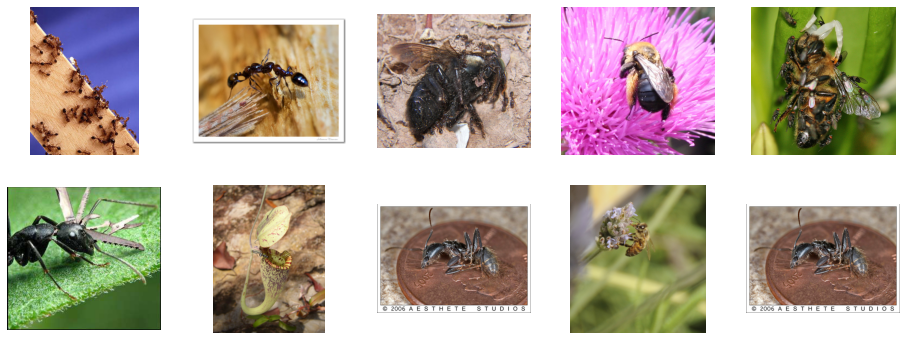

In [ ]:
import matplotlib.image as mpimg

# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    idx = np.random.randint(0,len(image_datasets['train'].samples))
    image = mpimg.imread(image_datasets['train'].samples[idx][0])
    plt.imshow(image)
    plt.axis('off');

Since we have very little training data it makes sense to use some data augmentation for training.

<span style="color:blue">

**Exercise 1**: Change the transforms in the code below in order to add some data augmentation to the training data. See if you can do a random crop instead of always cropping in the middle, and add horizontal flips. Then recreate the datasets and dataloaders.
    
</span>

In [ ]:
# CHANGE THE CODE BELOW

# ResNet input size
input_size = (224,224)

# Just normalization
data_transforms = {
    'train': transforms.Compose([
        # ADD YOUR CODE HERE
        transforms.RandomResizedCrop(input_size),
        # ADD YOUR CODE HERE
        transforms.RandomHorizontalFlip(),

        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

print("Done")

Initializing Datasets and Dataloaders...
Done


## Define the training function

The `train_model` function handles the training and validation of a given model. As input, it takes a PyTorch model, a dictionary of dataloaders, a loss function, an optimizer, and a specified number of epochs to train and validate for.

Instead of defining different functions for tranining and validation, we have combined everything into a single one below.

Note that we also have implemented early stopping - we keep track of the performance of our model on the validation set, and we keep a copy of the best model found using Python's `copy.deepcopy()` function. After training finishes, we copy the best weights from the saved model.

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    acc_history = {"train": [], "val": []}
    losses = {"train": [], "val": []}

    # we will keep a copy of the best weights so far according to validation accuracy
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    losses[phase].append(loss.item())

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).cpu().numpy()

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            
            acc_history[phase].append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, acc_history, losses

## Initialize the ResNet model

We will use the Resnet18 model (the smaller one), as our dataset is small and only has two classes. When we print the model, we see that the last layer is a fully connected layer as shown below:


   `(fc): Linear(in_features=512, out_features=1000, bias=True)`



In [ ]:
# This is a function that we will adapt in various ways during the rest of the notebook, right now, it just creates and returns the model and the input size of images
def initialize_model():
    # Resnet18  
    model = models.resnet18()
    
    input_size = 224

    return model, input_size



# Initialize the model
model, input_size = initialize_model()

# Print the model we just instantiated
print(model)
print(input_size)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<span style="color:blue">

**Exercise 2**: Modify the function `initialize_model` so that it takes the number of classes `num_classes` as an argument, and it reinitializes `model.fc` to be a Linear layer with 512 input features and `num_classes` output features. Then use the function to create a model with 2 output classes.

</span>

In [ ]:
# YOUR CODE HERE!

def initialize_model(num_classes):
    # Resnet18  
    model = models.resnet18()
    
    model.fc = nn.Linear(in_features = 512, out_features = num_classes)

    input_size = 224


    return model, input_size



# Initialize the model
model, input_size = initialize_model(num_classes = 2)

# Print the model we just instantiated
print(model)
print(input_size)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Run Training and Validation Step

Let's start by training the model from scratch. What do you think will happen?


In [ ]:
# Send the model to GPU
model = model.to(device)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Number of epochs to train for 
num_epochs = 15

optimizer_ft = optim.Adam(model.parameters(), lr=0.001)

# Train and evaluate
model, hist, losses = train_model(model, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/14
----------
train Loss: 0.6661 Acc: 0.6475
val Loss: 1.7209 Acc: 0.6275

Epoch 1/14
----------
train Loss: 0.6199 Acc: 0.6885
val Loss: 0.7811 Acc: 0.6471

Epoch 2/14
----------
train Loss: 0.6814 Acc: 0.6107
val Loss: 0.7331 Acc: 0.5882

Epoch 3/14
----------
train Loss: 0.6824 Acc: 0.6311
val Loss: 0.8453 Acc: 0.5882

Epoch 4/14
----------
train Loss: 0.6361 Acc: 0.6680
val Loss: 0.6586 Acc: 0.6471

Epoch 5/14
----------
train Loss: 0.6399 Acc: 0.6393
val Loss: 0.6318 Acc: 0.5948

Epoch 6/14
----------
train Loss: 0.6334 Acc: 0.6475
val Loss: 1.3935 Acc: 0.5882

Epoch 7/14
----------
train Loss: 0.6377 Acc: 0.6434
val Loss: 0.6629 Acc: 0.6667

Epoch 8/14
----------
train Loss: 0.6227 Acc: 0.6434
val Loss: 0.6377 Acc: 0.6536

Epoch 9/14
----------
train Loss: 0.6569 Acc: 0.5902
val Loss: 0.6185 Acc: 0.6601

Epoch 10/14
----------
train Loss: 0.6260 Acc: 0.6680
val Loss: 0.9305 Acc: 0.5490

Epoch 11/14
----------
train Loss: 0.6449 Acc: 0.6475
val Loss: 1.0984 Acc: 0.6013

Ep

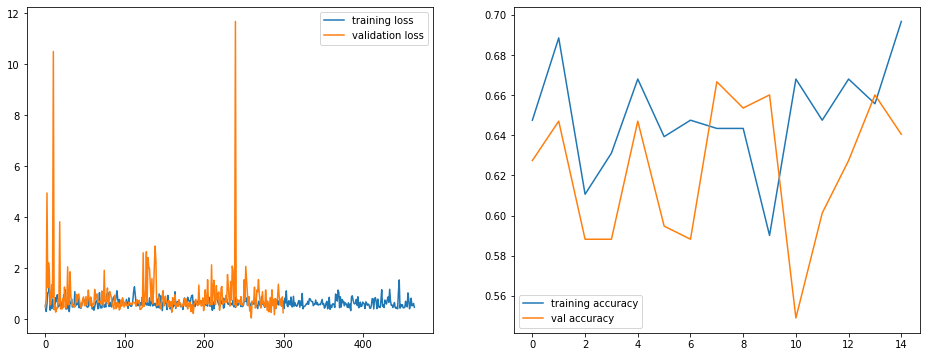

In [ ]:
# plot the losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(losses["train"], label="training loss")
ax1.plot(losses["val"], label="validation loss")
ax1.legend()

ax2.plot(hist["train"],label="training accuracy")
ax2.plot(hist["val"],label="val accuracy")
ax2.legend()

plt.show()   

Training from scratch with only 100 examples per class does not allow the network to perform very well in this task. It reaches at most 70% accuracy, and the loss seems not to descrease anymore.

## Preparing the model for finetuning and feature extraction

In order to finetune a model or use it for feature extraction, we need to first load the pretrained weights, and then to freeze the part of the model we do not want to change.

In order to load the pretrained weights for the ResNet model we must change a bit more the function `initialize model`. One one hand, we need to load the weights of the pre-trained ResNet model, trained on ImageNet.

Moreover, depending on whether we want to do finetuning (update all parameters of the model) or if we want to do feature extraction (update only the last fully connected layer), we must specify which parameter to update.

The following function sets the `.requires_grad` attribute of all the parameters in the model to False. This way we are freezing the model, since the parameters with `.requires_grad=False` will not be updated during training.


In [ ]:
def freeze_model(model):
    for param in model.parameters():
        param.requires_grad = False

<span style="color:blue">

**Exercise 3**: Modify the function `initialize_model` so that it takes an extra argument called `finetuning`. If this function is True, then all parameters of the model should be able to update. If it is false, this would mean that we want to do feature extraction, and all parameters of the model should be frozen except the last fully connected layer.
    
In addition, look up the documentation of [`models.resnet18()`](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html) and initialise the models with the `DEFAULT` weights.

Then create again your model, 
    
</span>

In [34]:
# YOUR CODE HERE

def initialize_model(num_classes, finetuning):
    
    # Resnet18  
    model = models.resnet18(weights = 'DEFAULT')

    if finetuning == False:
        freeze_model(model)
    
    model.fc = nn.Linear(in_features = 512, out_features = num_classes)
    input_size = 224

    return model, input_size


# Initialize the model
model, input_size = initialize_model(num_classes = 2, finetuning = True)

# Print the model we just instantiated
print(model)
print(input_size)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Create the Optimizer

The final step for finetuning and feature extracting is to create an optimizer that **only** updates the desired parameters. Recall that after loading the pretrained model, if `finetuning == False` (we want to do feature extraction instead) we manually set all of the parameters' `.requires_grad` attributes to False. But the parameters of the reinitialized layer that we add afterwards have `.requires_grad=True` by default. So *all parameters that have `.requires_grad=True` should be optimized*. Next, we make a list of such parameters and input this list to the Adam algorithm constructor.

In [ ]:
# Gather the parameters to be optimized/updated in this run. If we are finetuning we will be updating all parameters. However, if we are 
# doing feature extract method, we will only update the parameters that we have just initialized, i.e. the parameters with requires_grad is True.

params_to_update = []
for name, param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)


# Now give our optimiser the list of all the parameters that need to be optimized
optimizer_ft = optim.Adam(params_to_update, lr=0.001)

<br>
<span style="color:blue">

**Exercise 4**: Train the model with feature extraction for 15 epochs. This is, you must freeze all parameters except the last fully connected layer. Plot the train/val losses and accuracies.
    
Do not overwrite the previous best model, losses and accuracies, keep the new ones in separate variables.
    
</span>

In [ ]:
# YOUR CODE HERE
 

<br>
<span style="color:blue">

**Exercise 5**: Now train the model finetuning all the parameters for 15 epochs. Plot the train/val losses and accuracies.
    
Do not overwrite the previous best model, losses and accuracies, keep the new ones in separate variables.
    
</span>

In [ ]:
# YOUR CODE HERE


<br>
<span style="color:blue">

**Exercise 6**: Plot the  train/val losses and accuracies of all three approaches: training from scratch, finetunning, and festure extraction. To make easier visualization and comparison, use four `plt.subplots`: one for training loss, one for val loss, one for training accuracy, and one for val accuracy.

Make the plot self-explanatory: use legends and titles for each subplot, and a main title for the whole figure.

</span>

In [ ]:
# YOUR CODE HERE


<br>
<span style="color:blue">

**Exercise 7**: Train the ResNet-18 model for a different dataset (MIT Scenes) using the three training strategies: from scratch (do not load pre-trained weights), finetunning, and feature extraction. Train the model **for 40 epochs** - each training process should take approx. 10 minutes on colab.
    
The URL of the dataset is the following (you also have the file on Campus Virtual):
    
http://wwwo.cvc.uab.es/people/dimos/downloads/MIT_scenes.zip

The dataset contains scene images of **8 classes**: coast, forest, highway, inside_city, mountain, open_country, street, and tallbuilding. The number of training images per class varies between 187 and 295. 

Train the three models and plot the  train/val losses and accuracies of all of them. Again, to make easier visualization and comparison, use four `plt.subplots`: one for training loss, one for val loss, one for training accuracy, and one for val accuracy.
    
</span>

In [ ]:
# YOUR CODE HERE!


<br>
<span style="color:blue">

**Exercise 7**: Visualize some of the images along with the classification results of your best model.
    
*Hints: (1) The images that the dataloader gives you are already normalised, you need to "de-normalise" them if you want to see the true colours. (2) The order of dimensions of PyTorch is C, H, W, if you want to plot images you need your arrays ordered as H, W, C.*
    
</span>

In [ ]:
# YOUR CODE HERE!
